In [1]:
# to access functions from root directory 
import sys
sys.path.append('/data/ad181/RemoteDir/ada_multigrid_ppo')

In [2]:
%matplotlib notebook

import numpy as np
import pickle
import matplotlib.pyplot as plt

from copy import deepcopy
from utils.plot_functions import plot_s_snapshots
from utils.env_evaluate_functions import eval_actions
from utils.multigrid_framework_functions import generate_beta_environement

/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/co

In [3]:
seed=1
case = 'case_2'
opt_dir = './'+case

with open('../envs_params/env_data/env_list_eval.pkl', 'rb') as input:
    envs = pickle.load(input)
rl_indices = list(range(16))

<IPython.core.display.Javascript object>


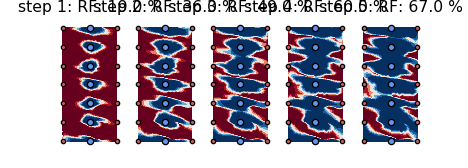

<IPython.core.display.Javascript object>


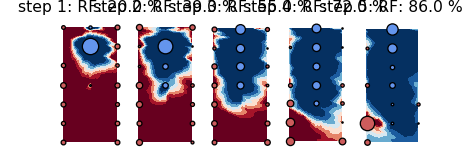

base: 0.673848792634217
optimum: 0.8556538005092451
% improvement: 26


<IPython.core.display.Javascript object>


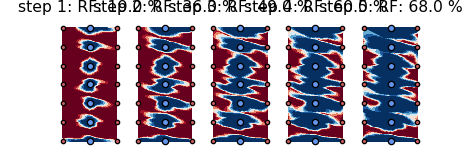

<IPython.core.display.Javascript object>


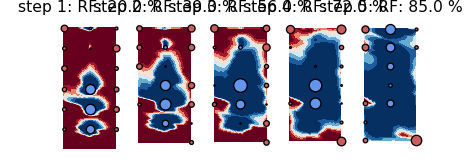

base: 0.678899724428962
optimum: 0.848006225556303
% improvement: 24


<IPython.core.display.Javascript object>


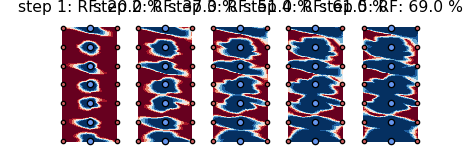

<IPython.core.display.Javascript object>


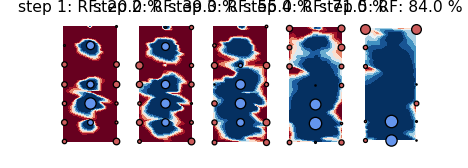

base: 0.6880664711806848
optimum: 0.8356898983452077
% improvement: 21


<IPython.core.display.Javascript object>


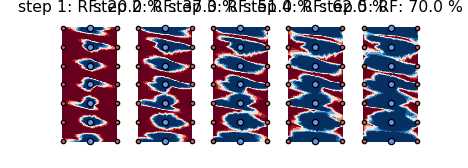

<IPython.core.display.Javascript object>


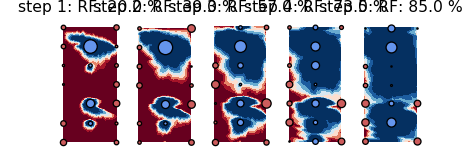

base: 0.6995593071153688
optimum: 0.8505278032590182
% improvement: 21


<IPython.core.display.Javascript object>


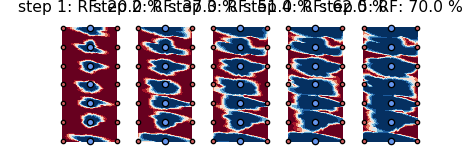

<IPython.core.display.Javascript object>


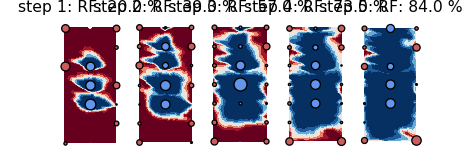

base: 0.6991638439990867
optimum: 0.8438198164860694
% improvement: 20


<IPython.core.display.Javascript object>


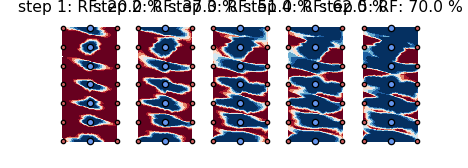

<IPython.core.display.Javascript object>


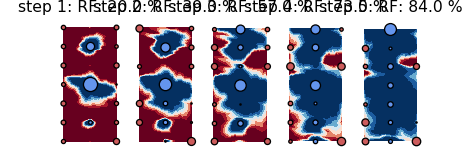

base: 0.6973706199664913
optimum: 0.8404305394459805
% improvement: 20


<IPython.core.display.Javascript object>


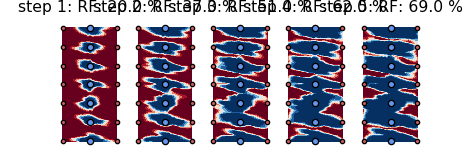

<IPython.core.display.Javascript object>


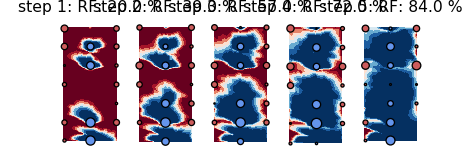

base: 0.6905640246943054
optimum: 0.8405124226923157
% improvement: 21


<IPython.core.display.Javascript object>


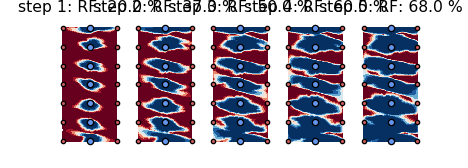

<IPython.core.display.Javascript object>


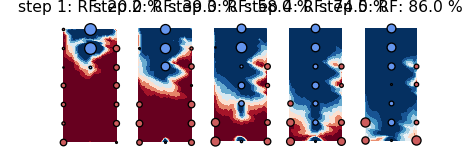

base: 0.6764348088036536
optimum: 0.8631952514407438
% improvement: 27


<IPython.core.display.Javascript object>


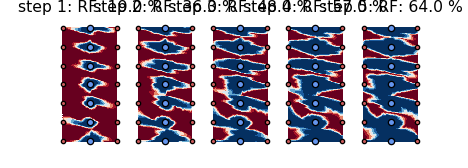

<IPython.core.display.Javascript object>


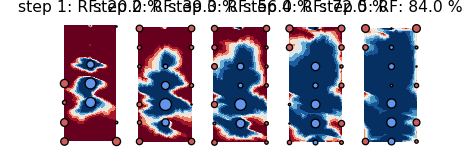

base: 0.6432459892055616
optimum: 0.839065720244003
% improvement: 30


<IPython.core.display.Javascript object>


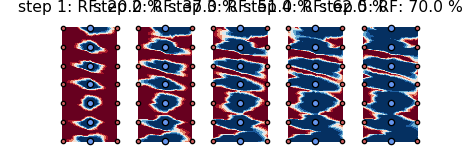

<IPython.core.display.Javascript object>


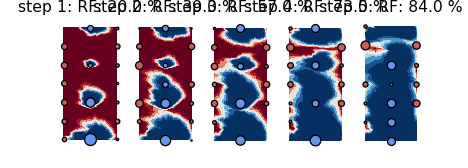

base: 0.6978214696474183
optimum: 0.8420910161539921
% improvement: 20


/data/ad181/RemoteDir/ada_multigrid_ppo/utils/plot_functions.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1,ctrl_steps,figsize=(round(figsize_scale*aspect)*ctrl_steps,figsize_scale) )


<IPython.core.display.Javascript object>


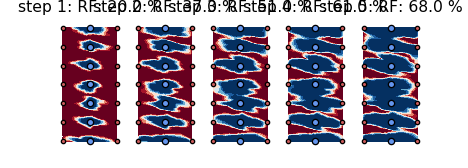

<IPython.core.display.Javascript object>


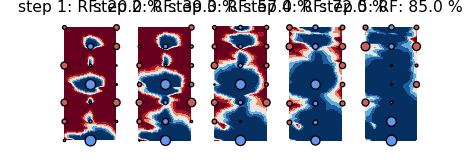

base: 0.6822771693325039
optimum: 0.845767260821104
% improvement: 23


<IPython.core.display.Javascript object>


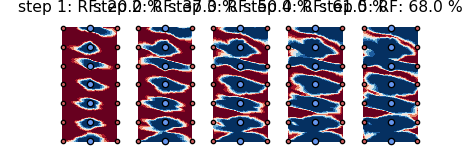

<IPython.core.display.Javascript object>


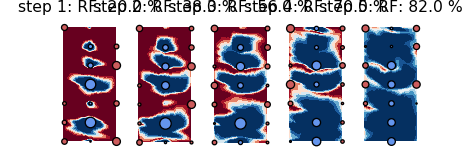

base: 0.6835625898906006
optimum: 0.8191216309237322
% improvement: 19


<IPython.core.display.Javascript object>


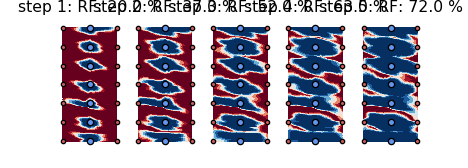

<IPython.core.display.Javascript object>


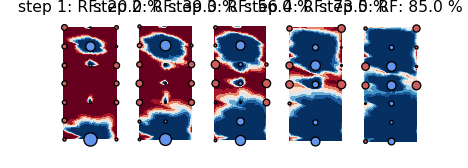

base: 0.718521812637836
optimum: 0.8486990210312083
% improvement: 18


<IPython.core.display.Javascript object>


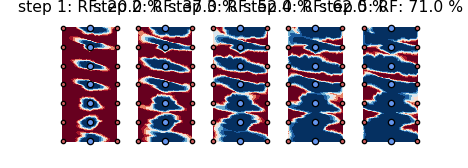

<IPython.core.display.Javascript object>


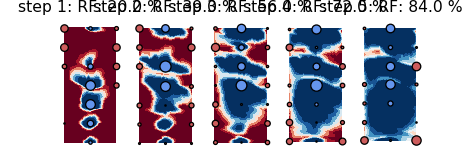

base: 0.7066351743097534
optimum: 0.8380382788049467
% improvement: 18


<IPython.core.display.Javascript object>


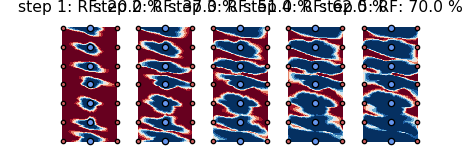

<IPython.core.display.Javascript object>


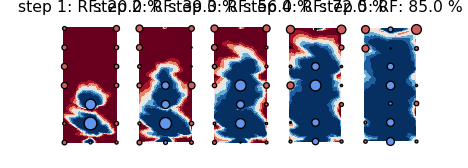

base: 0.699274987652723
optimum: 0.8475524610389538
% improvement: 21


<IPython.core.display.Javascript object>


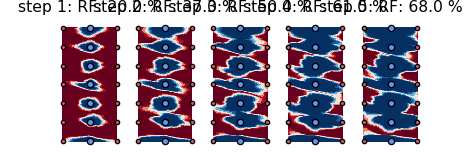

<IPython.core.display.Javascript object>


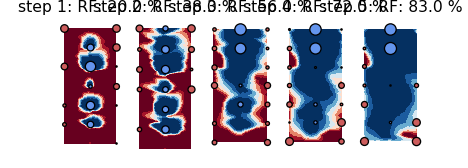

base: 0.6808547699475168
optimum: 0.8341506322743205
% improvement: 22


In [4]:
base_array, opt_array = [], []

for idx in rl_indices:
    
    env = envs[idx]
    
    base_action = np.ones((env.terminal_step, env.action_space.shape[0]))
    states, actions, rewards = eval_actions(env, base_action)
    fig = plot_s_snapshots(states, actions, rewards, 
                       s_max=0.8, s_min=0.2,
                       marker_size_ref=0.2, figsize_scale=1.8)
    base_reward = sum(rewards)

    opt_action = np.load(opt_dir+'/ck_argmax_'+str(idx)+'.npy').reshape(env.terminal_step, -1)
    states, actions, rewards = eval_actions(env, opt_action)
    fig = plot_s_snapshots(states, actions, rewards, 
                       s_max=0.8, s_min=0.2,
                       marker_size_ref=0.2, figsize_scale=1.8)
    opt_reward = sum(rewards)
    
    base_array.append(base_reward)
    opt_array.append(opt_reward)
    
    print(f'base: {base_reward}')
    print(f'optimum: {opt_reward}')
    print(f'% improvement: {int(100*np.abs(base_reward-opt_reward)/base_reward)}')  

/home/ad181/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


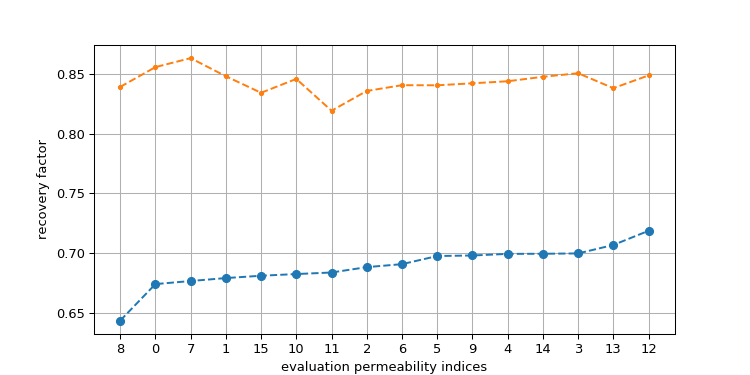

In [5]:
fig, axs = plt.subplots(1,1,figsize=(8,4) )

sort_indices = np.argsort(base_array)

axs.plot(np.array(base_array)[sort_indices], 'o--')
axs.plot(np.array(opt_array)[sort_indices], '.--')
axs.set_ylabel('recovery factor')
axs.set_xlabel('evaluation permeability indices')
axs.set_xticks(rl_indices)
axs.set_xticklabels(sort_indices)
axs.grid('on')
plt.show()

/home/ad181/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


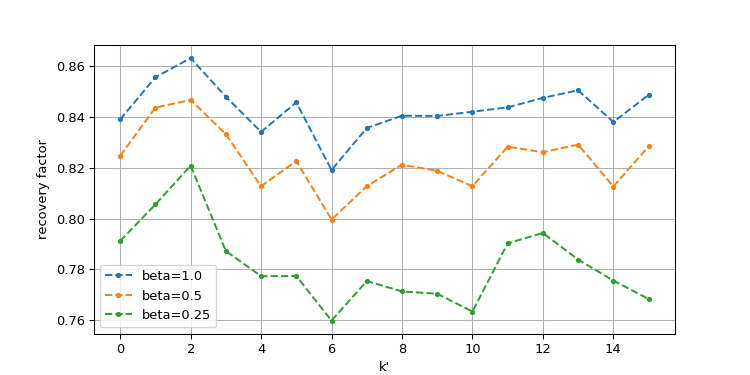

0.8432701111891965
0.8233605520547657
0.7820441149481208


In [12]:
with open('../envs_params/env_data/env_eval.pkl', 'rb') as input:
    env = pickle.load(input)    
env_half = generate_beta_environement(env, 0.5, env.p_x, env.p_y, seed)
env_quarter = generate_beta_environement(env, 0.25, env.p_x, env.p_y, seed)

env_array = [env, env_half, env_quarter]

rs = []
for env_ in env_array:
    env_copy = deepcopy(env_)
    k_list = env_.k_list
    rs_beta = []
    for i,k in enumerate(k_list):
        env_copy.set_k(np.array([k]))
        opt_action = np.load(opt_dir+'/ck_argmax_'+str(i)+'.npy').reshape(env.terminal_step, -1)
        states, actions, rewards = eval_actions(env_copy, opt_action)
        rs_beta.append(np.sum(rewards))
    rs.append(rs_beta)
    
fig, axs = plt.subplots(1,1,figsize=(8,4) )
for r in rs:
    print(np.mean(r))
    axs.plot(np.array(r)[sort_indices], '.--')
axs.set_ylabel('recovery factor')
axs.set_xlabel('k\'')
axs.legend(['beta=1.0', 'beta=0.5', 'beta=0.25'])
axs.grid('on')